# Práctica 6 Arboles binarios
Juan C. Agui  
ICAI IMAT Abril 2024

**Aviso**  
En este notebook, utilizamos el paquete de clases dinámicas jdc ( https://pypi.org/project/jdc/ ) instalar con  "pip install jdc" que nos permite añadir métodos a clases previamente definidos en otra celda anterior del mismo notebook.  De esta manera podemos ir comentando y enriqueciendo las clases de forma gradual, que debe ser más inteligible, que no el código en su conjunto.

Para su uso, hay que empezar la celda con la directiva : "%%add_to ClassName"   y los métodos definidos en esta celda se añaden a la clase ClassName.

Hagamos unos import

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import datetime 
import jdc

## Definición Clases básicas

## Clase Nodo

In [2]:

# definición de clase nodo, con algunas funciones de utilidad...
class Node():
    def __init__(self,  key=None, value=None):
        # pointer to parent
        self.parent  = None 
        # pointer to left child  
        self.left    = None 
        # pointer to right child
        self.right   = None 
        # key that identifies the node
        self.key     = key    
        # additional data
        self.value    = value   # additional data
    
    def __str__(self):
        return f'Node {self.key=}, {self.value=} id={id(self)}'

    def __repr__(self):
        return f'Node key={self.key}'

    def __lt__(self,other):
        return self.key < other.key
    
    def show(self):
        parentId = self.parent if self.parent else "N/A"
        leftId = self.left.key if self.left else "N/A"
        rightId = self.right.key if self.right else "N/A"
        return f"Node Id={self.key}  Parent={parentId} Left={leftId} Right={rightId}, Height={self.height()}"
    
    def isLeaf(self):
        if self.left or self.right:
            return False
        else:
            return True
    def isOrphan(self):
        return self.parent is None
    
    def isLeftChild(self):
        if self.isOrphan():
            return False
        
        if self.parent.left == self:
            return True
        else:
            return False
    
    def isRightChild(self):
        if self.isOrphan():
            return False
            
        if self.parent.right == self: 
            return True
        else:
            return False
        
    def height(self):
        if self.isLeaf():
            return 0
        else:
            l_height = self.left.height() if self.left else 0
            r_height = self.right.height() if self.right else 0
            return 1 + max(l_height, r_height)
        
    # retorna el skew o desquilibrio de un nodo, mirando a la altura de sus hijos...
    def skew(self):
        l_height = self.left.height()  + 1 if self.left  else 0
        r_height = self.right.height() + 1 if self.right else 0
        return r_height - l_height
    
    def connectAsLeftChildOfNode(self,parent):
        """ sets self as left child of parent"""
        self.parent = parent
        parent.left = self
        
    def connectAsRightChildOfNode(self,parent):
        """ sets self as right child of parent"""
        self.parent = parent
        parent.right = self

print ("Node class updated")

Node class updated


## Clase BST, Binary Search Tree
Aquí definimos lo básico del BST y un método plot que nos permite visualizarlo fácilmente.... Luego lo vamos enriqueciendo progresivamente en celdas posteriores

In [3]:
      
class BST():
    def __init__(self, rootNode=None):
        self.rootNode = rootNode
    
    def __str__(self):
        """   printable info of a tree  """
        return f'Tree with root Node key = {self.rootNode.key} and Height= {self.height()} Size = {self.size()} Skew = {self.skew()}'
        
    def height(self):
        """   returns height of a tree, 0  if empty  """
        if self.rootNode:
            return self.rootNode.height()
        else:
            return 0
        
    def skew(self):
        if self.rootNode is None:
            return 0
        else:
            return self.rootNode.skew()
    

    def size(self):
        """ Number of nodes in tree, including root """
        if self.rootNode:
            leftSize = BST(self.rootNode.left).size()   if self.rootNode.left else 0
            rightSize = BST(self.rootNode.right).size() if self.rootNode.right else 0
            return leftSize + rightSize + 1    
        else:
            return 0        

    def plot(self,header=None):

        if header is None:
            header = self.__str__()
            
        fig, ax = plt.subplots(1, 1, figsize=(10, 15))

        ax.set_aspect('equal')

        height = self.height()
        width = 2**(self.height()+1 )
        ratio = width/height

        nodeRadius = 0.12*ratio

        ax.set_xlim(-(width//2 - 1)*1.1, (width//2)*1.1)
        ax.set_ylim((height+2)*ratio, -ratio)
        
        
        def addNode(aNode, origin):
            if origin is None:
                origin = (0, 0)
            hspace = 2**(aNode.height()-1)


            if aNode.left:
                leftChildOrigin = (origin[0]-hspace, (origin[1]+ratio))
                line = lines.Line2D([origin[0], leftChildOrigin[0]], [
                                    origin[1], leftChildOrigin[1]], lw=1, color='black', axes=ax)
                ax.add_line(line)
                addNode(aNode.left, leftChildOrigin)
            if aNode.right:
                rightChildOrigin = (origin[0]+hspace,(origin[1]+ratio))
                line = lines.Line2D([origin[0], rightChildOrigin[0]], [
                                    origin[1], rightChildOrigin[1]], lw=1, color='black', axes=ax)
                ax.add_line(line)
                addNode(aNode.right, rightChildOrigin)
            color = getattr(aNode,'color',"black")
            if not isinstance(color,str):
                color = color.name.lower()
            ax.add_patch(plt.Circle(origin, nodeRadius,
                         color=color, ec='r', fill=True))
            plt.text(origin[0], origin[1]-1.25*nodeRadius, f"{aNode.key}")

        addNode(self.rootNode, (0, 1))

        ax.set_title(header)
        plt.show()
        
print (f"Classes redefined at time {datetime.datetime.now()}")

Classes redefined at time 2024-04-09 01:52:43.835134


## Punto 1: Creación manual y display del nodo
Basico, crear nodo, árbol y crear un arbol con el nodo as root.

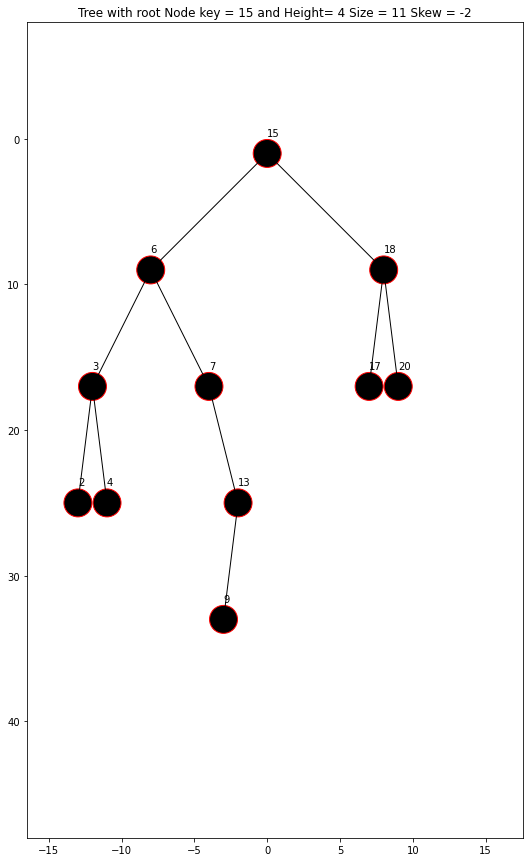

In [4]:
def buildTree(keys):
    nodes = { key: Node(key,str(key)) for key in keys}
    nodes[6].connectAsLeftChildOfNode(nodes[15])
    nodes[3].connectAsLeftChildOfNode(nodes[6])
    nodes[2].connectAsLeftChildOfNode(nodes[3])
    nodes[4].connectAsRightChildOfNode(nodes[3])
    nodes[7].connectAsRightChildOfNode(nodes[6])
    nodes[13].connectAsRightChildOfNode(nodes[7])
    nodes[9].connectAsLeftChildOfNode(nodes[13])
    nodes[17].connectAsLeftChildOfNode(nodes[18])
    nodes[20].connectAsRightChildOfNode(nodes[18])
    nodes[18].connectAsRightChildOfNode(nodes[15])

    # Creo el árbol, simplemente indicándole el nodo raíz.
    bst = BST(nodes[15])
    return bst
keys = [2,3,4,6,7,9,13,15,18,17,20]
bst = buildTree(keys)
# y lo dibujo...
bst.plot()


##  Punto 2: Secuenciación Central
Añadimos un  método de secuenciaCentral de la clase BST

In [5]:
%%add_to BST
def secuenciaCentral(self):
    """ Return the trasverse sequence  ( list of tuple (key,value)) using central order 
        lo hace de formar recursiva sobre los subarboles izquierdo, luego el nodo central, y luego el nodo derecho...
    """
    nodesList = []
    if self.rootNode.left:
        nodesList.extend(BST(self.rootNode.left).secuenciaCentral())
    nodesList.append((self.rootNode.key, self.rootNode.value))
    if self.rootNode.right:
        nodesList.extend(BST(self.rootNode.right).secuenciaCentral())
    return nodesList

Y lo ejecutamos,...

In [6]:
print (f"La secuencia central es: {bst.secuenciaCentral()}")

La secuencia central es: [(2, '2'), (3, '3'), (4, '4'), (6, '6'), (7, '7'), (9, '9'), (13, '13'), (15, '15'), (17, '17'), (18, '18'), (20, '20')]


## EXTRA: Max, min, next and prev para claves
Añadimos métodos sencillos a la clase árbol...

In [7]:
%%add_to BST

def minKey(self):
    """ returns the first in trasverse sequence"""
    aNode = self.rootNode
    if aNode.left:
        return BST(aNode.left).minKey()
    else:
        return aNode.key

def maxKey(self):
    """ returns the first in trasverse sequence"""
    aNode = self.rootNode
    if aNode.right:
        return BST(aNode.right).maxKey()
    else:
        return aNode.key

Y los ejecutamos...

In [8]:
print(f"Max Key is {bst.maxKey()}")
print(f"Min Key is {bst.minKey()}")

Max Key is 20
Min Key is 2



El sucesor y el predecesor son algo más complicados.   
Primero tenemos que implementar un find... por clave

In [9]:
%%add_to BST
def getNodeByKey(self, aKey):
    # returns a node with the given Key , or None if not found
    
    node = self.rootNode        
    # do binary tree search starting at node
    if aKey == node.key:
        return node
    elif aKey < node.key:
        if node.left:
            return BST(node.left).getNodeByKey(aKey)
        else:
            return None
    else:
        if node.right:
            return BST(node.right).getNodeByKey(aKey)
        else:
            return None    

Y los probamos en todos los casos...

In [10]:
print (f"Searching for node with Key 7 returns node {bst.getNodeByKey(7)}")
print (f"Searching for node with non existing  Key 23 returns node {bst.getNodeByKey(23)}")

Searching for node with Key 7 returns node Node self.key=7, self.value='7' id=130543720268560
Searching for node with non existing  Key 23 returns node None


In [11]:
%%add_to BST
def nextKey(self,aKey):
    
    # primero encuentra el nodo que contiene la clave dada...
    baseNode = self.getNodeByKey(aKey)
    if not baseNode:
        raise Exception(f"base Key {aKey} not in tree")
    
    # if there is a right child, it will be the min Key of the right subtree
    if baseNode.right:
        return BST(baseNode.right).minKey()
    else:
        # go up till you climb up leaning to the right 
        node = baseNode
        while True:
            if node.parent:
                if node != node.parent.left:
                    node = node.parent
                else:
                    return node.parent.key
            else:
                return None

def prevKey(self,aKey):
    
    # primero encuentra el nodo que contiene la clave dada...
    baseNode = self.getNodeByKey(aKey)
    if not baseNode:
        raise Exception(f"base Key {aKey} not in tree")
    
    # if there is a left child... this is it
    if baseNode.left:
        return BST(baseNode.left).maxKey()
    else:
        # go up till you climb  a left leaning arc...
        node = baseNode
        while True:
            if node.parent:
                if node != node.parent.right:
                    node = node.parent
                else:
                    return node.parent.key
            else:
                return None

Testeemos el método de forma exhaustiva...

In [12]:
for key in keys:
    print (f"{key} is  betweeen  {bst.prevKey(key)} and  {bst.nextKey(key)}")

2 is  betweeen  None and  3
3 is  betweeen  2 and  4
4 is  betweeen  3 and  6
6 is  betweeen  4 and  7
7 is  betweeen  6 and  9
9 is  betweeen  7 and  13
13 is  betweeen  9 and  15
15 is  betweeen  13 and  17
18 is  betweeen  17 and  20
17 is  betweeen  15 and  18
20 is  betweeen  18 and  None


fijate cómo retorna None cuando no hay prev o next...

## Punto 3: Insertar una pareja key, value

In [13]:
%%add_to BST
def insert(self, key,value=None):   
    
    # Crea un nodo con la info provista
    newNode = Node(key,value)
        
    p_node = node = self.rootNode
    
    # empty tree
    if node is None:
        self.rootNode = newNode
        return True
    
    # otherwise find the insertion node p_node
    else:
        while node is not None:
            p_node = node
            if key == node.key:
                raise Exception("Nodo con identica clave ya presente")
            elif key < node.key:
                node = node.left
            else:
                node = node.right
        newNode.parent = p_node

        # decide if is going to be left or right child and insert it.
        if newNode < p_node:
            p_node.left = newNode
        else:
            p_node.right = newNode
    
    # signal everything ok by returning True
    return True

Prueba, inserta y dibuja !!

Insertando (8, Ocho )en el arbol retorna True


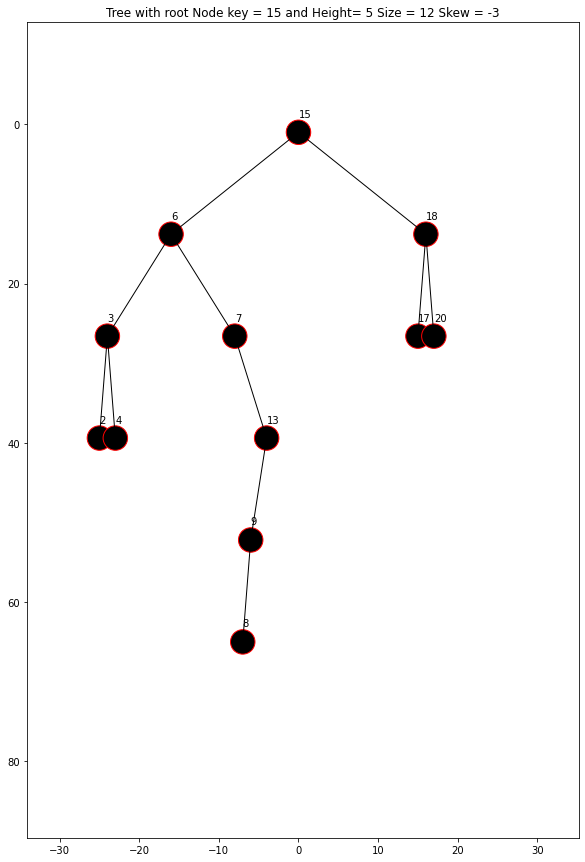

In [14]:
print(f"Insertando (8, Ocho )en el arbol retorna { bst.insert(8,'Ocho')}")
bst.plot()

Insertando (16, dieciseis )en el arbol retorna True


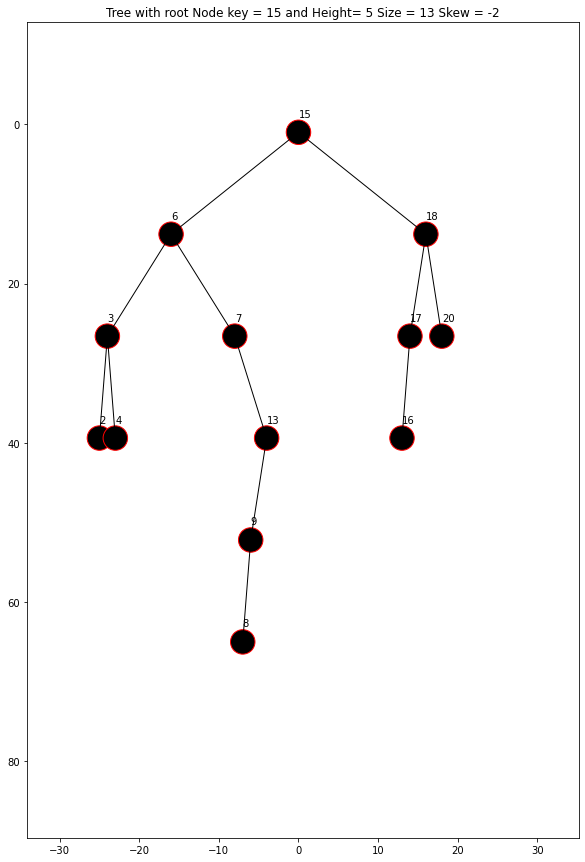

In [15]:
# más... insertando 16
# test it
print(f"Insertando (16, dieciseis )en el arbol retorna { bst.insert(16,'dieciseis')}")
bst.plot()

##  Punto 4: Finalmente veamos el borrado de una clave

In [16]:
%%add_to Node
 # añadimos un método al nodo, para cambiar el contenido
def swapNodesContent(self, otherNode):
    # we need to keep external references compatible
    self.key, otherNode.key = otherNode.key, self.key
    self.value, otherNode.value = otherNode.value, self.value
    return None

In [17]:
%%add_to BST

# primero implementemos un sucesor en el árbol de un nodo dado
def nextNode(self, aNode):
    # retorna el nodo con la next key de la clave del nodo dado...
    # none if no next Node
    nextKey = self.nextKey(aNode.key)
    if nextKey  is not None:
        return self.getNodeByKey(nextKey)
    else:
        return None

def deleteKey(self,key):

        # lets locate the node first
        node = self.getNodeByKey(key)
        if not node:
            raise Exception("Key {key} not in tree")

        # now proceed with given alg    
        if (node.left is None) or (node.right is None):
                y = node                         # casos c1 ó c2, leaf, o un hijo solamente....
        else: 
            y = self.nextNode(node)              # caso c3, dos hijos
        
        if y.left is not None:               # en c2 ó c3 x apunta al nodo a unir
            x = y.left
        else:
            x= y.right
        
        if x is not None:
            x.parent = y.parent              # solo activo para c2 y c3, actualiza padre

        if y.parent is None:
            self.root = x                   # actualiza raíz si es necesario 
            
        else:
            if y == y.parent.left:           # actualiza hijo
                y.parent.left = x
            else:
                y.parent.right = x
        
        if ( y != node ):                   # copiar todos los datos del nodo "y" en nodo "n";
            y.swapNodesContent(node)
            
        return     

lets try it..  
borremos la clave 16 que es un leaf



[(2, '2'), (3, '3'), (4, '4'), (6, '6'), (7, '7'), (8, 'Ocho'), (9, '9'), (13, '13'), (15, '15'), (17, '17'), (18, '18'), (20, '20')]


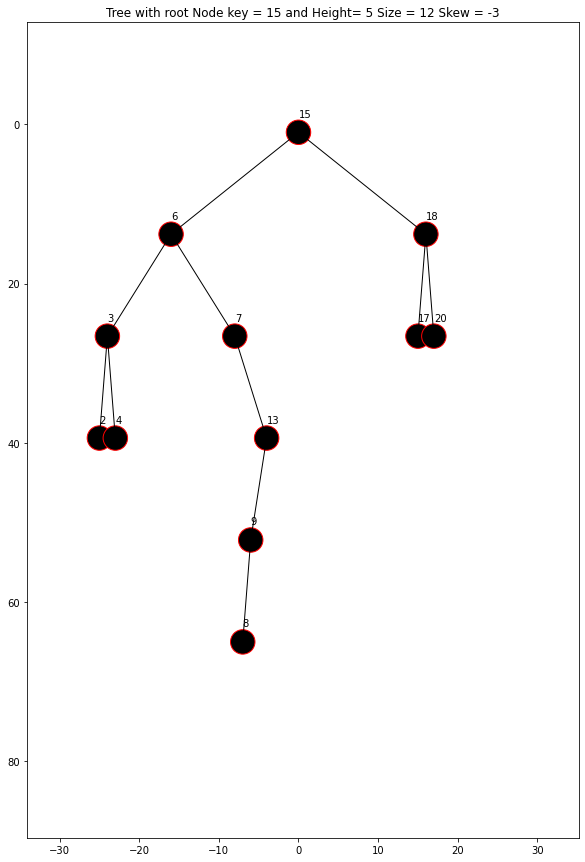

In [18]:
bst.deleteKey(16)
print (bst.secuenciaCentral())
bst.plot()

Ahora el caso 2, un nodo intermedio con un hijo... el 7

[(2, '2'), (3, '3'), (4, '4'), (6, '6'), (8, 'Ocho'), (9, '9'), (13, '13'), (15, '15'), (17, '17'), (18, '18'), (20, '20')]


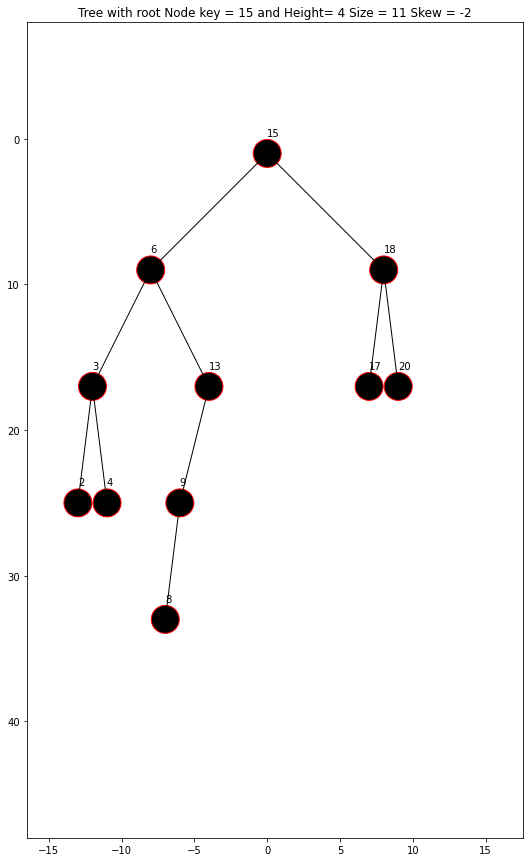

In [19]:
bst.deleteKey(7)
print (bst.secuenciaCentral())
bst.plot()

and case 3, take 6 away...

[(2, '2'), (3, '3'), (4, '4'), (8, 'Ocho'), (9, '9'), (13, '13'), (15, '15'), (17, '17'), (18, '18'), (20, '20')]


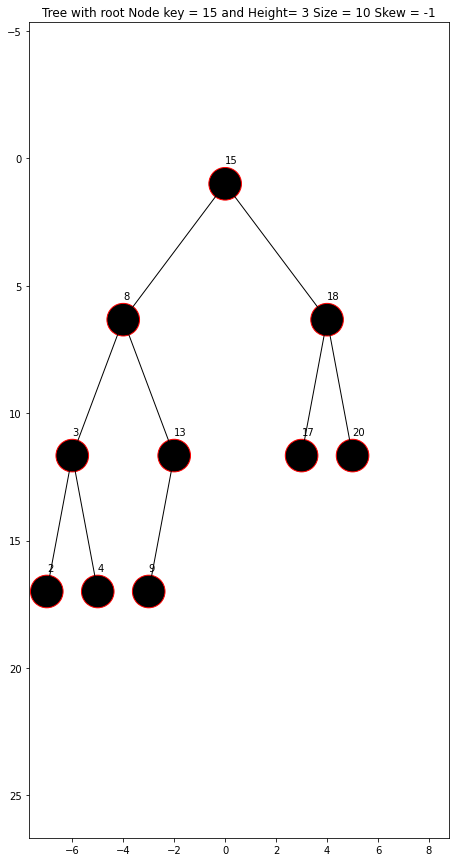

In [20]:
# and case 3, take 6 away...
bst.deleteKey(6)
print (bst.secuenciaCentral())
bst.plot()

finally lets remove the root !!  

[(2, '2'), (3, '3'), (4, '4'), (8, 'Ocho'), (9, '9'), (13, '13'), (17, '17'), (18, '18'), (20, '20')]


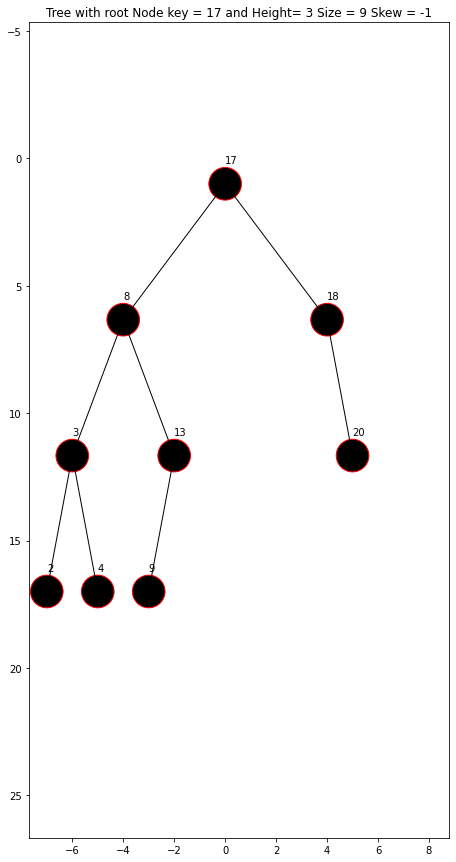

In [21]:
bst.deleteKey(15)
print (bst.secuenciaCentral())
bst.plot()

## Estrambote... qué pasa si construimos el árbol con la función insert y la secuencia de claves randomizada ??
Probémoslo !!

Las claves se insertan en la secuencia randomizada  [18, 2, 20, 4, 6, 15, 17, 9, 7, 13, 3]
[(2, '2'), (3, '3'), (4, '4'), (6, '6'), (7, '7'), (9, '9'), (13, '13'), (15, '15'), (17, '17'), (18, '18'), (20, '20')]


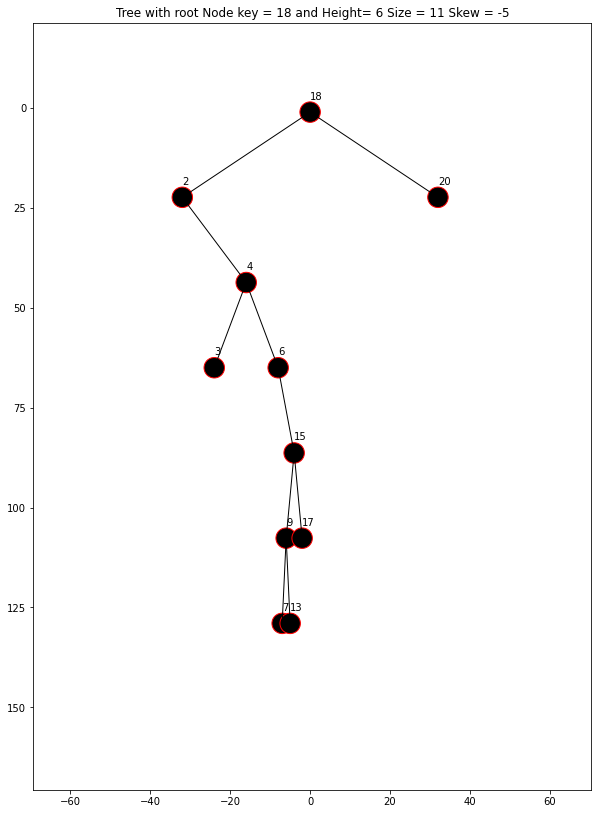

In [22]:
import random
random.shuffle(keys)
print (f"Las claves se insertan en la secuencia randomizada  {keys}")
# make an empty tree
bst = BST()
# add the keys
for key in keys:
    bst.insert(key, str(key))
# plot it
print (bst.secuenciaCentral())
bst.plot()

**Ejecuta la celda repetidas veces y ve como la secuencia central es siempre la misma, pero el arbol tiene forma y skew muy diferente !**

Prueba con la secuencia ordenada, qué pasa ??

-------
# ROTACIONES !!!
Implementemos el código de la rotación


## Rotación izquierda

In [23]:
%%add_to BST
def leftRotate(self, node: Node, DEBUG = False):
    pivot  = node                   # B in the figure
    rChild = node.right             # D in the figure
    pos    = rChild.left            # C in the figure
    if DEBUG: print (f"leftRotate pivot is {pivot}, rChild is {rChild} pred = {pos}")
    
    # move rightChild into pivot position which means to assign lchhild  as left of right for pivot parent....
    
    rChild.parent = pivot.parent
    if pivot.parent  is None:                     # no parent, likely root
        self.rootNode = rChild                    # reset root
    else:
        if pivot.isLeftChild(): 
            pivot.parent.left  = rChild
        else:
            pivot.parent.right = rChild
    
    # push pivot to the leftChild of rChild, that updates pivot parent 
    rChild.left = pivot
    pivot.parent = rChild
    
    # move pivot,predecesor a into pivot left child except for degenerate case
    pivot.right = pos
    if pos: pos.parent = pivot
    
    return
print ("Left rotate method updated")

Left rotate method updated


## Rotación derecha

In [24]:
%%add_to BST
def rightRotate(self, node: Node, DEBUG = False):
    pivot  = node                    # D in the figure
    lChild = node.left               # B in the figure
    pred   = lChild.right            # C in the figure
    
    if DEBUG: print (f"rightRotate pivot is {pivot} lChild = {lChild} pred is {pred}")
    if DEBUG: print (f"rightRotate lChild is {lChild}")
    if DEBUG: print (f"rightRotate predecesor is {pred}")
    
    # move leftChild into pivot position which means to assign lchhild  as left of right for pivot parent....
    lChild.parent = pivot.parent
    if pivot.parent  is None:                     # no parent, likely root
        self.rootNode = lChild
    else:
        if pivot.isLeftChild(): 
            pivot.parent.left  = lChild
        else:
            pivot.parent.right = lChild


    # push pivot to the rightChild of lChild, that updates pivot parent 
    lChild.right = pivot
    pivot.parent = lChild
    
    # move pivot,predecesor or none
    pivot.left = pred
    if pred:
        pred.parent = pivot
        
    return

## Probando.... reconstruyamos el árbol...

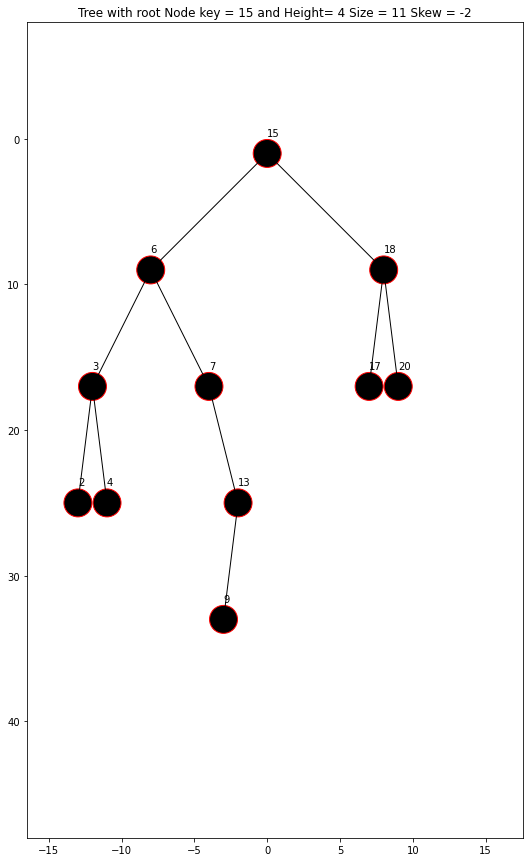

In [25]:
bst = buildTree(keys)
bst.plot()

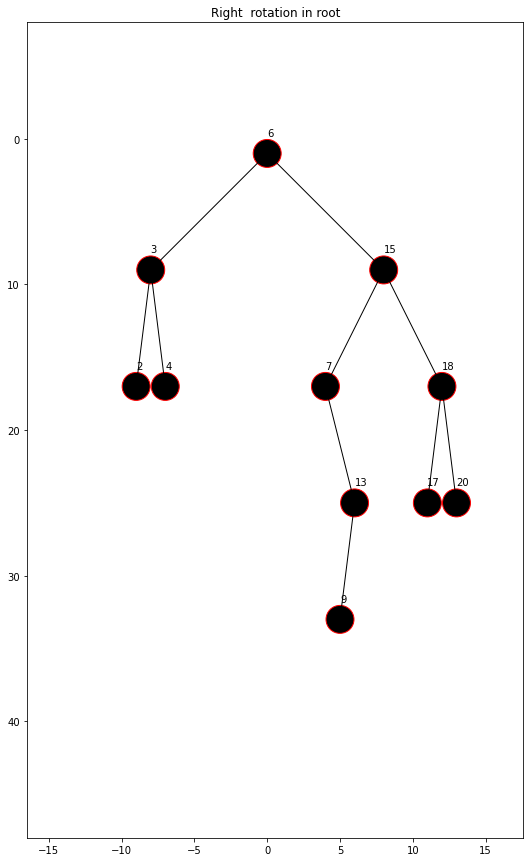

In [26]:
bst.rightRotate(bst.rootNode)
bst.plot("Right  rotation in root")


Restore con una left del root

Node self.key=6, self.value='6' id=130543514800272


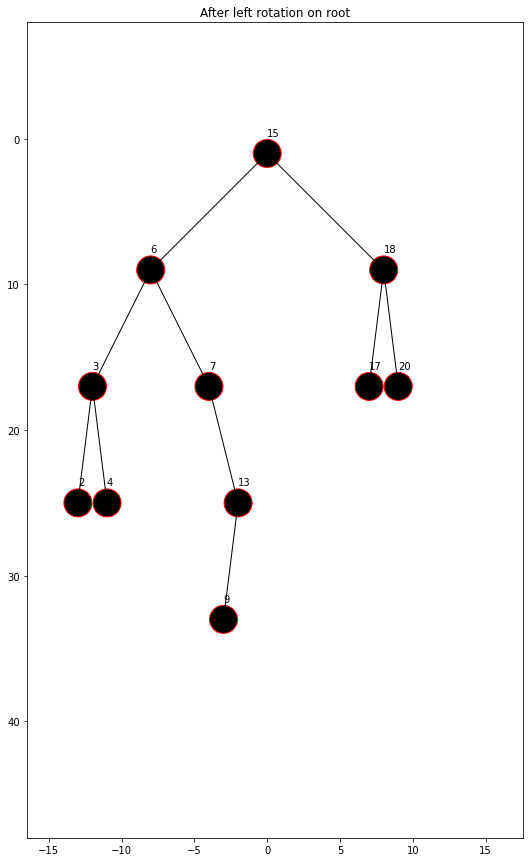

In [27]:
rNode = bst.rootNode
print (rNode)
bst.leftRotate(rNode)
bst.plot("After left rotation on root")

Left rotate on 6 node...

leftRotate pivot is Node self.key=6, self.value='6' id=130543514800272, rChild is Node self.key=7, self.value='7' id=130543514557920 pred = None


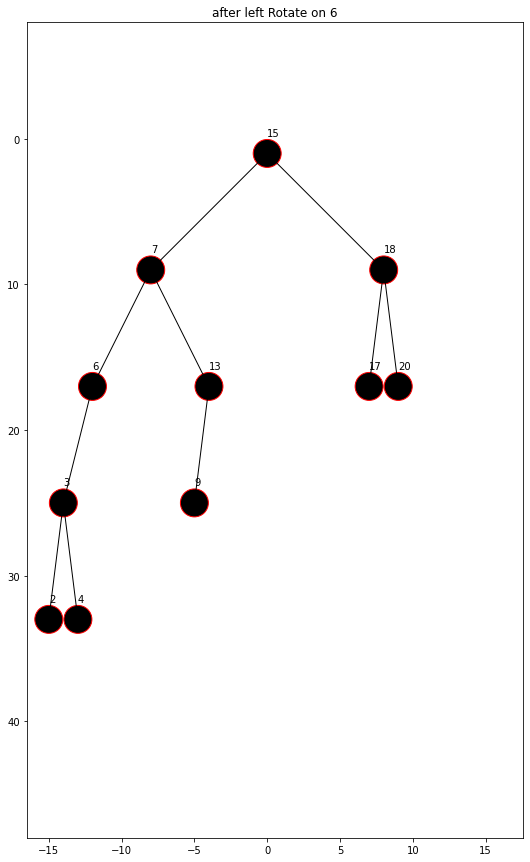

In [28]:
node6 = bst.getNodeByKey(6)
bst.leftRotate(node6, DEBUG=True)
bst.plot("after left Rotate on 6")

leftRotate pivot is Node self.key=7, self.value='7' id=130543514557920, rChild is Node self.key=13, self.value='13' id=130543514562048 pred = Node self.key=9, self.value='9' id=130543514565840


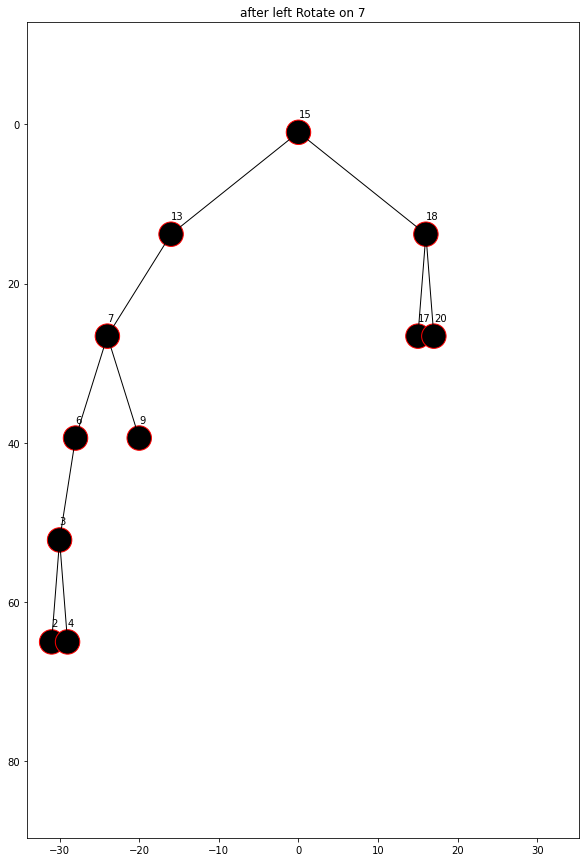

In [29]:
# Hagamoslo peor... LR on 7
node7 = bst.getNodeByKey(7)
bst.leftRotate(node7, DEBUG=True)
bst.plot("after left Rotate on 7")

and correct with a rightRotate on 7

rightRotate pivot is Node self.key=13, self.value='13' id=130543514562048 lChild = Node self.key=7, self.value='7' id=130543514557920 pred is Node self.key=9, self.value='9' id=130543514565840
rightRotate lChild is Node self.key=7, self.value='7' id=130543514557920
rightRotate predecesor is Node self.key=9, self.value='9' id=130543514565840


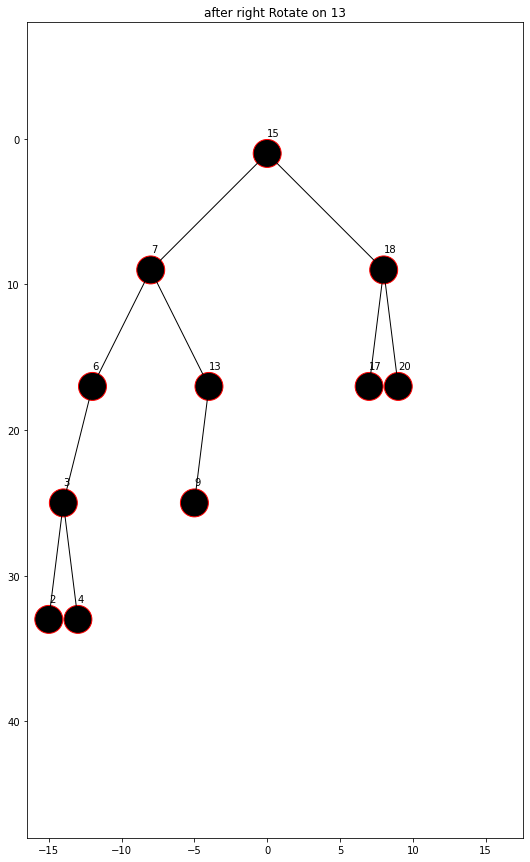

In [30]:
node13 = bst.getNodeByKey(13)
bst.rightRotate(node13, DEBUG=True)
bst.plot("after right Rotate on 13")

rightRotate pivot is Node self.key=15, self.value='15' id=130543514801472 lChild = Node self.key=7, self.value='7' id=130543514557920 pred is Node self.key=13, self.value='13' id=130543514562048
rightRotate lChild is Node self.key=7, self.value='7' id=130543514557920
rightRotate predecesor is Node self.key=13, self.value='13' id=130543514562048


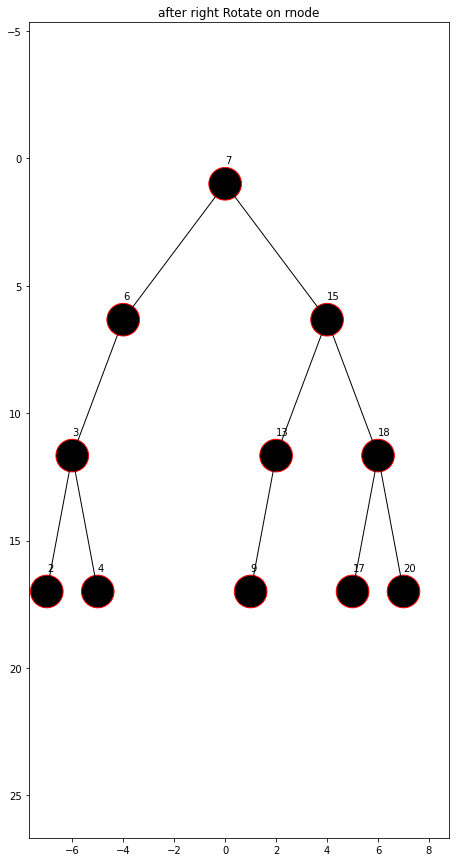

In [31]:
rnode = bst.rootNode
bst.rightRotate(rnode, DEBUG=True)
bst.plot("after right Rotate on rnode")